In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255 , x_test / 255
x_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
x_train = np.expand_dims(x_train, -1)
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test = np.expand_dims(x_test, -1)
x_test.shape

(10000, 28, 28, 1)

In [9]:
K = len(set(y_train))
K

10

In [11]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='softmax')(x)

model = Model(i, x)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.5754 - accuracy: 0.7936 - val_loss: 0.4044 - val_accuracy: 0.8482
Epoch 2/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3643 - accuracy: 0.8636 - val_loss: 0.3601 - val_accuracy: 0.8639
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3117 - accuracy: 0.8837 - val_loss: 0.3133 - val_accuracy: 0.8808
Epoch 4/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2752 - accuracy: 0.8964 - val_loss: 0.3038 - val_accuracy: 0.8869
Epoch 5/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2491 - accuracy: 0.9054 - val_loss: 0.2889 - val_accuracy: 0.8944
Epoch 6/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2256 - accuracy: 0.9139 - val_loss: 0.2874 - val_accuracy: 0.8978
Epoch 7/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2066 - accuracy: 0.9210 - val_loss: 0.3031 -

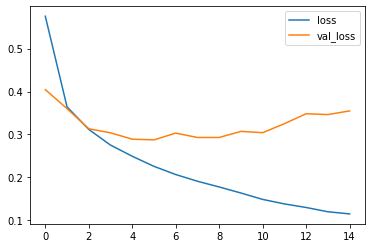

In [13]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

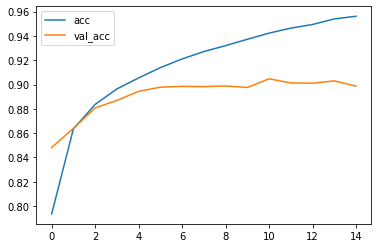

In [14]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[823   3  23  29   4   2 109   0   7   0]
 [  1 977   1  14   3   0   3   0   1   0]
 [ 16   3 846  21  48   0  64   0   2   0]
 [ 13   8   9 928  20   1  19   0   2   0]
 [  0   2  61  34 813   0  84   0   5   1]
 [  0   0   0   0   0 981   1  11   3   4]
 [ 76   1  73  29  84   1 721   0  14   1]
 [  0   0   0   0   0  13   0 969   0  18]
 [  1   0   1   5   5   1   7   3 976   1]
 [  1   0   0   0   0   7   0  39   0 953]]


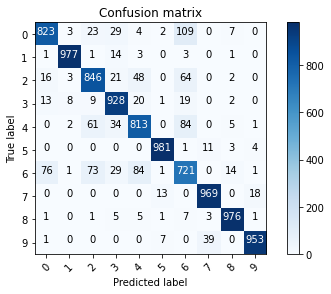

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



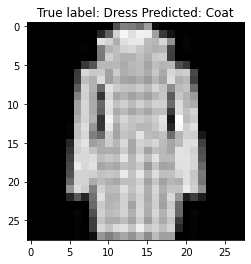

In [18]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
